In [1]:
from brian2tools import *

In [7]:
20*volt

20. * volt

In [8]:
1000*amp

1. * kamp

In [9]:
10*nA*5*Mohm

50. * mvolt

In [10]:
#5*amp+10*volt

manipulation d'un neuron

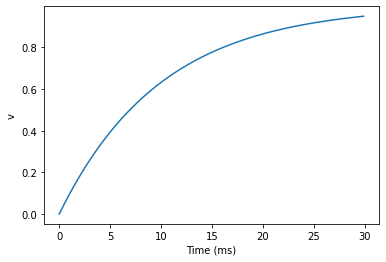

In [11]:
start_scope()

tau = 10*ms
#equation qui gere le neuron
# ": type"
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

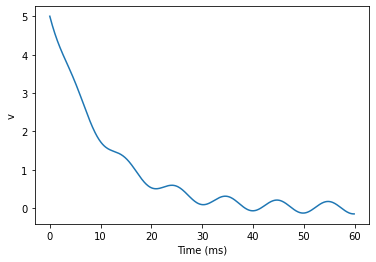

In [22]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)
G.v = 5
#pour acceder a une valeur de notre equation : neuron.variable
run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

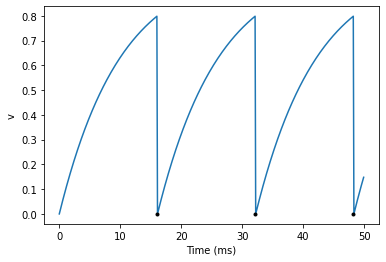

In [38]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
# ajouter des spikes t: hreshold='v>0.8', reset='v = 0'
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
#recording spike
spikemon = SpikeMonitor(G)
run(50*ms)


plot(M.t/ms, M.v[0])
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('v');

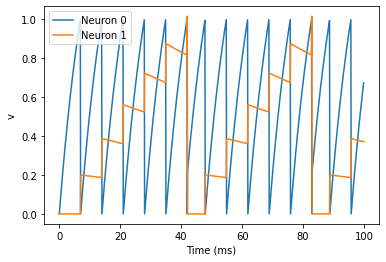

In [43]:
#Connection entre deux neurons
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
#les valeurs initiale de I et tau pour chaque neuron
G.I = [2,0] 
G.tau = [10, 100]*ms

# connecter les deux neurons
#on_pre , c'est comment se comportera le deuxieme neuron quand le premier fait une impulsion
#ici il augment v de 0.2
S = Synapses(G, G, on_pre='v_post += 0.2')
S.connect()

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

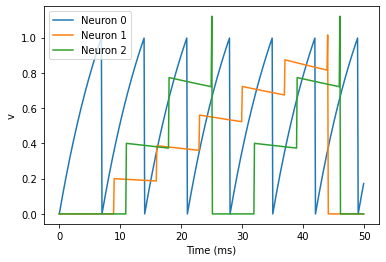

In [45]:
#ajout d'un poids et delay avant d'appliquer le changement
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2]) #connecter neuron 0 vers 1 et 2
S.w = 'j*0.2'
S.delay = 'j*2*ms'

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

## visualisation

In [48]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')


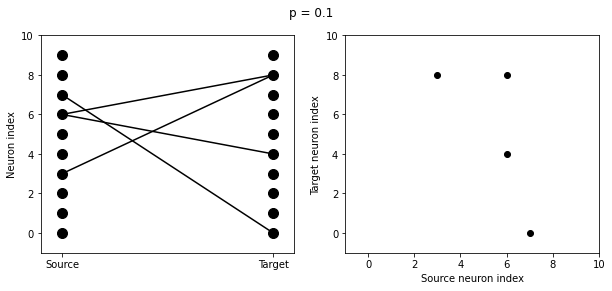

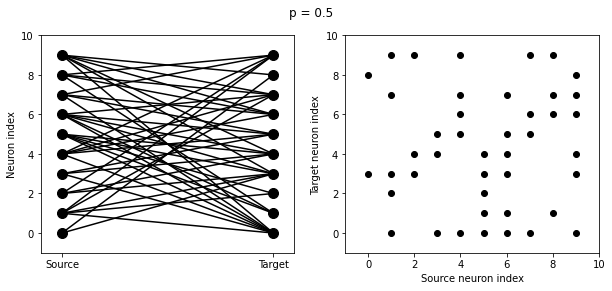

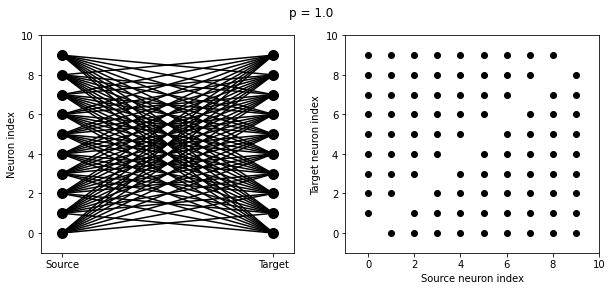

In [51]:
start_scope()

N = 10
G = NeuronGroup(N, 'v:1')

for p in [0.1, 0.5, 1.0]:
    S = Synapses(G, G)
    #p=pourcentage des neurons au quel il sera connecter
    S.connect(condition='i!=j', p=p) #on connecte pas un neuron a lui meme 
    visualise_connectivity(S)
    suptitle('p = '+str(p))

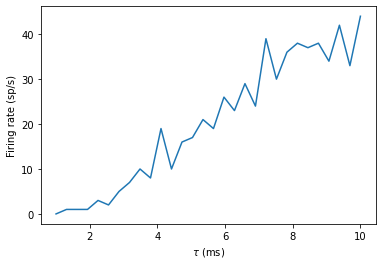

In [64]:
start_scope() 
num_inputs = 20
input_rate = 10*Hz
weight = 0.4
tau_range = linspace(1, 10, 30)*ms
output_rates = []
# Construct the network just once
P = PoissonGroup(num_inputs, rates=input_rate)
eqs = '''
dv/dt = -v/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
S = Synapses(P, G, on_pre='v += weight')
S.connect()
M = SpikeMonitor(G)
# Store the current state of the network
store()
for tau in tau_range:
    # Restore the original state of the network
    restore()
    # Run it with the new value of tau
    run(1*second)
    output_rates.append(M.num_spikes/second)
plot(tau_range/ms, output_rates)
xlabel(r'$\tau$ (ms)')
ylabel('Firing rate (sp/s)');

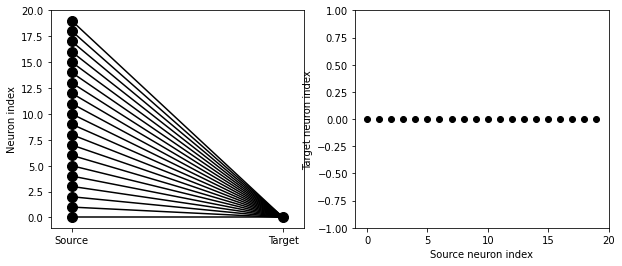

In [65]:
visualise_connectivity(S)